In [5]:
import scipy.ndimage
import psi4
import pdft
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import libcubeprop
import numpy as np
import pickle

In [8]:
data = pickle.load(open( "save.p", "rb" ) )
data.keys()

EOFError: Ran out of input

In [4]:
f1e = np.array(data['f1_energy'])
f2e = np.array(data['f2_energy'])

x = np.array(data['x'])
y = np.array(data['y'])

nuclear_nad = np.array(data['nuclear_nad'])
ep = np.array(data['ep'])

nuclear_nad

(49,)

LAD bench mark.

In [17]:
energy = []
psi4.set_options({
    'REFERENCE': 'UKS'
})
for bondlength in np.linspace(4, 20, 49):
    print("============%f==============" % bondlength)
    Full_Molec =  psi4.geometry("""
    nocom
    noreorient
    He %f 0.0 0.00
    He -%f 0.0 0.00
    units bohr
    symmetry c1
    """ % (bondlength / 2, bondlength / 2))
    
    E = psi4.energy("SVWN/aug-cc-pvdz")
    
    energy.append(E*2)

============4.000000==============
============4.333333==============
============4.666667==============
============5.000000==============
============5.333333==============
============5.666667==============
============6.000000==============
============6.333333==============
============6.666667==============
============7.000000==============
============7.333333==============
============7.666667==============
============8.000000==============
============8.333333==============
============8.666667==============
============9.000000==============
============9.333333==============
============9.666667==============
============10.000000==============
============10.333333==============
============10.666667==============
============11.000000==============
============11.333333==============
============11.666667==============
============12.000000==============
============12.333333==============
============12.666667==============
============13.000000==============
==========

In [36]:
energy_pbe = []
psi4.set_options({
    'REFERENCE': 'UKS'
})
for bondlength in np.linspace(4, 20, 49):
    print("============%f==============" % bondlength)
    Full_Molec =  psi4.geometry("""
    nocom
    noreorient
    He %f 0.0 0.00
    He -%f 0.0 0.00
    units bohr
    symmetry c1
    """ % (bondlength / 2, bondlength / 2))
    
    E = psi4.energy("pbe/aug-cc-pvdz")
    
    energy_pbe.append(E*2)

============4.000000==============
============4.333333==============
============4.666667==============
============5.000000==============
============5.333333==============
============5.666667==============
============6.000000==============
============6.333333==============
============6.666667==============
============7.000000==============
============7.333333==============
============7.666667==============
============8.000000==============
============8.333333==============
============8.666667==============
============9.000000==============
============9.333333==============
============9.666667==============
============10.000000==============
============10.333333==============
============10.666667==============
============11.000000==============
============11.333333==============
============11.666667==============
============12.000000==============
============12.333333==============
============12.666667==============
============13.000000==============
==========

In [24]:
f1e + f2e + ep + nuclear_nad*2 - np.array(energy)

array([0.00038241, 0.00039461, 0.00040641, 0.00041455, 0.00041857,
       0.00041963, 0.00041904, 0.00041764, 0.00041591, 0.00041421,
       0.00041234, 0.00041087, 0.00040914, 0.00040766, 0.0004071 ,
       0.00040454, 0.00040359, 0.00040454, 0.00040304, 0.0003996 ,
       0.00039738, 0.0003983 , 0.00040161, 0.00040437, 0.00040294,
       0.00039623, 0.00038865, 0.00038486, 0.00038628, 0.0003908 ,
       0.00039506, 0.00039724, 0.00039757, 0.00039741, 0.00039742,
       0.00039719, 0.00039638, 0.00039503, 0.00039342, 0.00039198,
       0.00039097, 0.00039042, 0.00039035, 0.00039062, 0.00039074,
       0.00039052, 0.00038997, 0.00038919, 0.00038835])

<IPython.core.display.Javascript object>


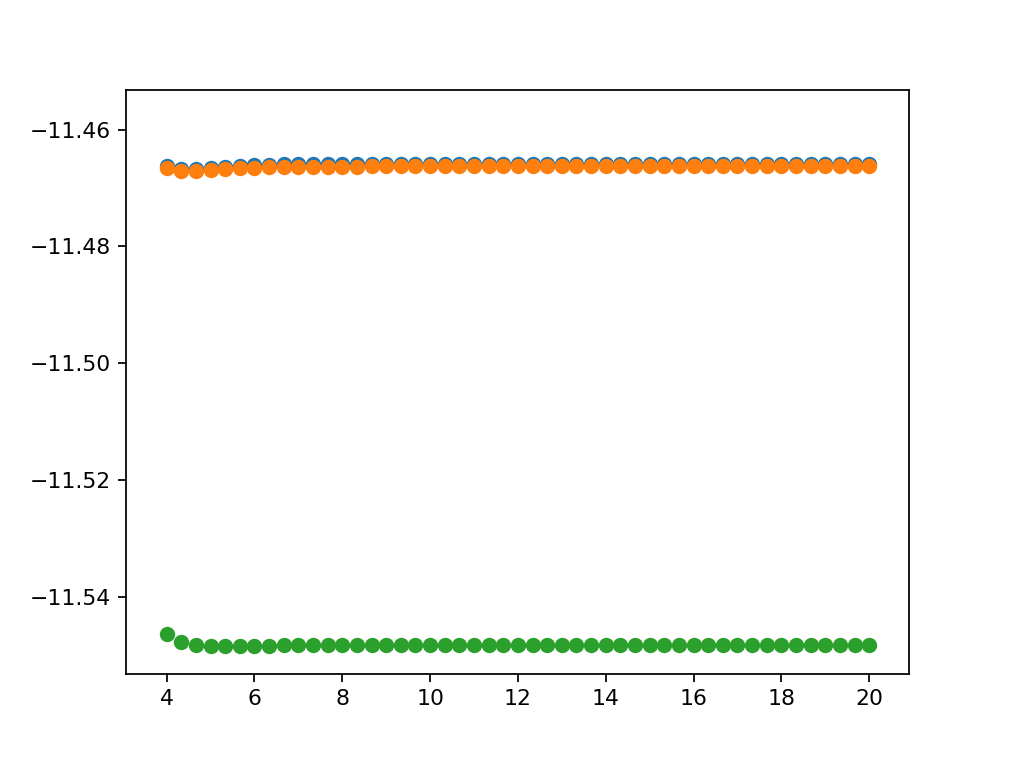

In [39]:
fig2, ax2 = plt.subplots(1, 1)
ax2.scatter(x, f1e + f2e + ep + nuclear_nad*2)
ax2.scatter(x, np.array(energy))
ax2.scatter(x, np.array(energy_pbe))

<IPython.core.display.Javascript object>


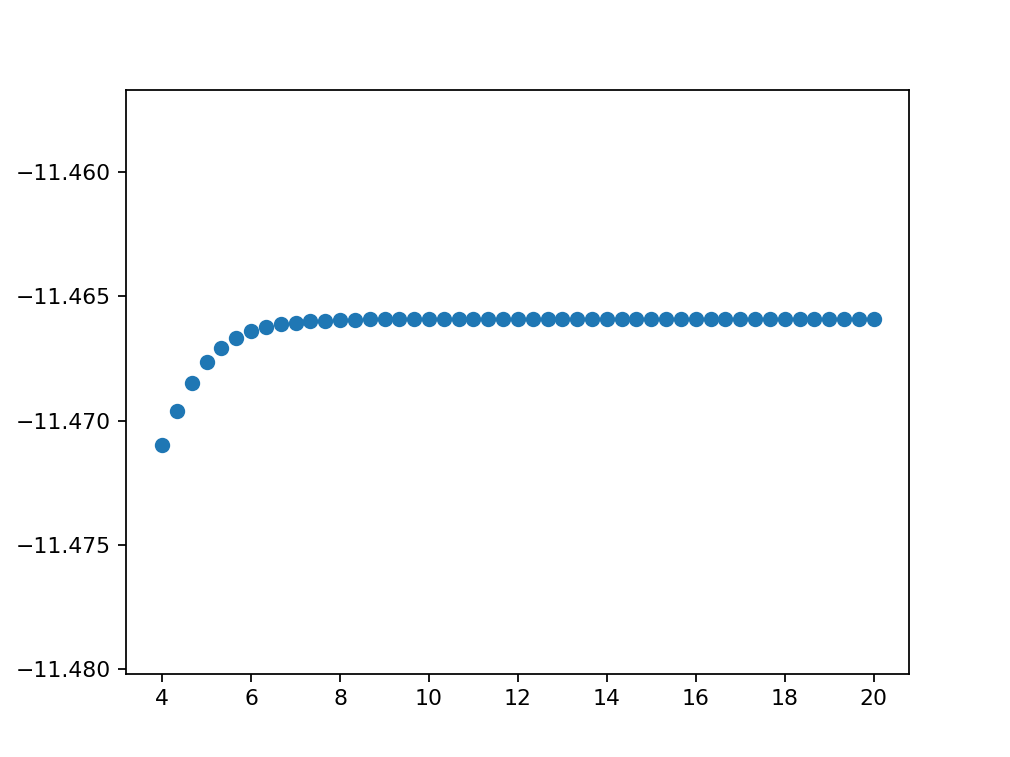

In [31]:
fig2, ax2 = plt.subplots(1, 1)
ax2.scatter(x, f1e + f2e + ep + y + nuclear_nad*2)
# ax2.scatter(x, f1e + f2e)
# ax2.scatter(x, nuclear_nad)
# ax2.scatter(x, ep)
# ax2.scatter(x, y)

<IPython.core.display.Javascript object>


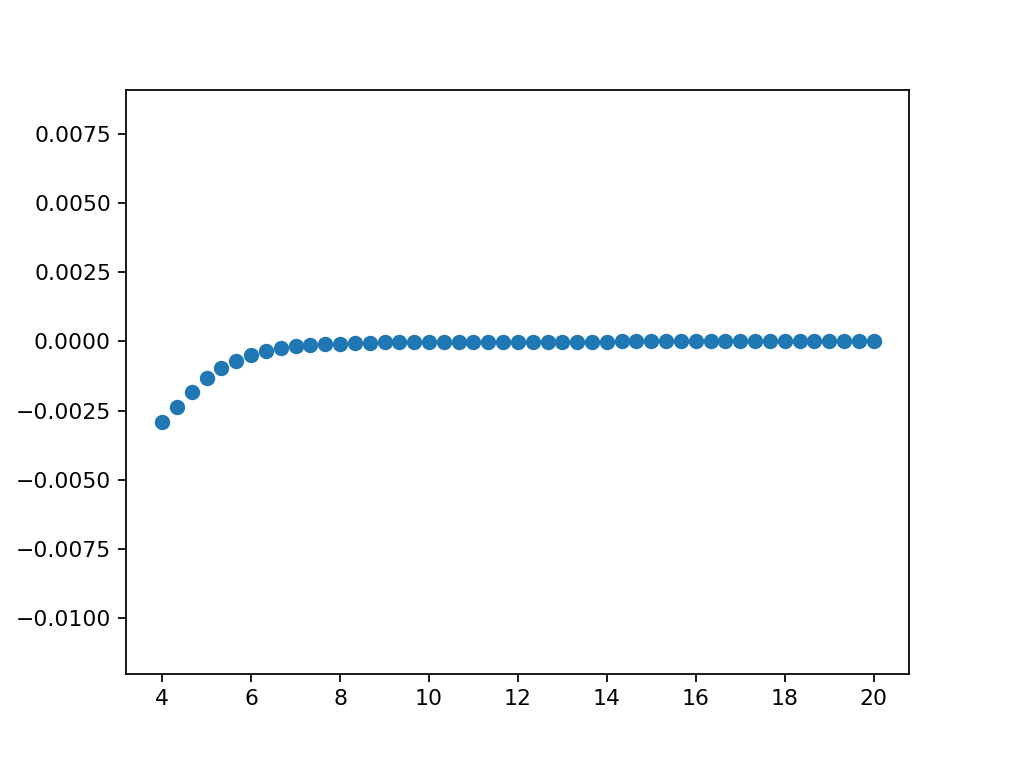

In [38]:
fig2, ax2 = plt.subplots(1, 1)
ax2.scatter(x, y + energy_pbe - (y + energy_pbe)[-1])